#### Import Data and Libraries

In [2]:
import swarms
import matplotlib.pyplot as plt
import pandas as pd
import pread as pr
from numpy import linspace, pi, array

plt.style.use('paper')

In [3]:
"""Access times with data.ages in years
          radii with data.radii in meters
          luminosity with data.lumin in watts
First entry is the root directory.
Second entry is the subdirectory.
Third entry is the filename.
"""
def data_read(mass):
    data = pr.Pread('data', 'Z002', 'pltlum_M'+str(mass)+'Z002.csv') 
    return data

#### Initial Parameters

In [4]:
AU = 1.496e11
pc = 3.086e16
Msun = 1.989e30
Lsun = 3.828e26
Mmoon = 7.35e22
Mearth = 5.972e24

RHO=1500 
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = 6.9911e7
lamb = 1.65e-6

Npts = 500
GPIIWA = 0.2 # GPI inner working angle in arcsec
GPIOWA = 1.2 # Outer working angle

#### Helper Functions

In [5]:
def a_opt(t, s, M_s, M_plt, M_init):
    f_vrel = 4/pi
    Qd = s.computeQd(s.Dc)
    part1 = (M_s/1.989e30)**0.33 * f_vrel**0.55
    part2 = (M_plt/5.972e24)**0.06 * Qd**0.15 * eta
    part3 = t * (M_init/5.972e24) / (RHO * (s.Dc/1000)) 

    return 50 * part1 / part2 * part3**0.24 

In [6]:
def Fstar(Ls, Bnu, Ts, apl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = Ls * Bnu
    part2 = 4 * sig * Ts ** 4 * apl ** 2
    return part1 / part2

In [7]:
def contrast_scat(A, g, Q, a_pl):
    return (A*g*Q) / (pi*a_pl**2)

In [8]:
def lum_to_temp(L, R):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = L / (4 * pi * sig * R**2)
    return (part1)**(1./4.)

#### Compute semi-major axis vs. contrast ratio for scattered swarm light

In [12]:
def swarm_apl_contrast(df, Mplt, M0, t):
    #t = 5e7 
    
    # Fix the mass of the planet at 1 M_jup
    plt_data = data_read(str(Mplt))
    Mplt = Mplt*Mearth
    
    star_fs_list = []
    star_types = []
    for i, star in df.iterrows():
        fs_list = []
        
        M_s = star['Mass'] * Msun
        L_s = star['Lum'] * Lsun
        T_star = star['Fe_H_Teff']
        d_pl = star['Distance_distance'] * pc
        contrast_thresh = star['contrast_thresh']
        a_plv = linspace(GPIIWA*d_pl/pc * AU, GPIOWA*d_pl/pc * AU, Npts)
        for i in range(len(a_plv)):
            s2 = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, Mplt,
                                    a_plv[i], R_pl, eta, Nstr, d_pl,
                                    rho=RHO, fQ=5, f_vrel=4/pi,
                                    correction=True, alpha=1.2)

            s2.updateSwarm(t)

            swarm_contrast = contrast_scat(s2.computeAtot(), 0.32, 0.08, a_plv[i])
            fs_list.append(swarm_contrast)

        star_fs_list.append(fs_list)
        
    return star_fs_list, t, Mplt, star_types

In [10]:
def plotting_swarm(fig, ax, df, Mplt, M0, time, color, label):
    cr_apl_swarm, t, Mplt, star_types = swarm_apl_contrast(df, Mplt, M0, time)

    visited_types = []
    color_map = ['r', 'b', 'g', 'y', 'c']
    
    angles = linspace(GPIIWA, GPIOWA, Npts)
    
    for i in range(len(cr_apl_swarm)):
        if i==0:
            ax.plot(angles, cr_apl_swarm[i], color=color, alpha=0.3, lw=3, label=label)          
        else:
            ax.plot(angles, cr_apl_swarm[i], color=color, alpha=0.3, lw=3)

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 813608576000.0 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 821760966541.0822 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 829913357082.1643 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 838065747623.2465 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 846218138164.3286 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 854370528705.4109 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 862522919246.493 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 870675309787.5752 69911000.0 0.4 6.0 8.39169808e+17 1

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2460391465298.597 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2468543855839.6797 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2476696246380.7617 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2484848636921.8438 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2493001027462.926 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2501153418004.008 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2509305808545.0903 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2517458199086.1724 69911000.0 0.4 6.0 8.39169

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4156088697843.6875 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4164241088384.7695 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4172393478925.852 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4180545869466.934 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4188698260008.016 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4196850650549.098 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4205003041090.1807 69911000.0 0.4 6.0 8.39169808e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 4213155431631.2627 69911000.0 0.4 6.0 8.391698

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2584757213114.2285 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2599376880609.2188 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2613996548104.2085 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2628616215599.198 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2643235883094.1885 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2657855550589.1787 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5026241684777.555 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5040861352272.545 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5055481019767.535 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5070100687262.525 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5084720354757.516 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5099340022252.506 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 5

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8067132523735.472 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8081752191230.461 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8096371858725.451 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8110991526220.441 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8125611193715.432 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8140230861210.421 69911000.0 0.4 6.0 1.504881728e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 8

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1523488025651.3027 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1529352105811.6233 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1535216185971.9438 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1541080266132.2646 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1546944346292.5852 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1552808426452.9058 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1558672506613.2266 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1564536586773.547 69911000.0 0.4 6.0 6.036216e+17 1500
7

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2807721580761.523 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2813585660921.8438 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2819449741082.1646 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2825313821242.485 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2831177901402.8057 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2837041981563.1265 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2842906061723.447 69911000.0 0.4 6.0 6.036216e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2848770141883.7676 69911000.0 0.4 6.0 6.036216e+17 1500
7.3

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 890593371575.1503 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 895630664400.8015 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 900667957226.4529 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 905705250052.1042 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 910742542877.7555 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 915779835703.4067 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 920817128529.0581 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 925854421354.7095 69911000.0 0.4 6.0 5.18515892e+17 1500


7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1978648621915.8315 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1983685914741.483 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1988723207567.1343 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1993760500392.7854 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1998797793218.4368 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 2003835086044.0881 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 2008872378869.7395 69911000.0 0.4 6.0 5.18515892e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 2013909671695.3906 69911000.0 0.4 6.0 5.18515892e+1

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 639850724296.5931 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 644597391390.7815 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 649344058484.97 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 654090725579.1583 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 658837392673.3467 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 663584059767.535 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 668330726861.7234 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 673077393955.9119 69911000.0 0.4 6.0 4.88600208e+17 1500
7.3

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1826517497843.6873 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1831264164937.8757 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1836010832032.064 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1840757499126.2524 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1845504166220.4407 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1850250833314.6292 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1854997500408.8176 69911000.0 0.4 6.0 4.88600208e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1859744167503.0059 69911000.0 0.4 6.0 4.88600208e+1

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 448988274148.2966 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 452319047695.39075 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 455649821242.485 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 458980594789.57916 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 462311368336.67334 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 465642141883.7675 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 468972915430.8617 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 472303688977.95593 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1141789171943.8877 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1145119945490.982 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1148450719038.0762 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1151781492585.1704 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1155112266132.2646 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1158443039679.3586 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1161773813226.453 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1165104586773.5469 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 1

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1837920843286.573 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1841251616833.6672 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1844582390380.7615 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1847913163927.8557 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1851243937474.9497 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1854574711022.044 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1857905484569.1382 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1861236258116.2324 69911000.0 0.4 6.0 3.428546e+17 1500
7.35e+24 1

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2425906596681.363 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2433971445739.479 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2442036294797.595 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2450101143855.7114 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2458165992913.8276 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2466230841971.9443 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2474

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4442118861210.421 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4450183710268.537 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4458248559326.653 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4466313408384.77 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4474378257442.886 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4482443106501.002 69911000.0 0.4 6.0 8.30158688e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 44905079

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2020395452280.561 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2027112192480.962 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2033828932681.3628 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2040545672881.7632 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2047262413082.164 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2053979153282.565 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2060695893482.9658 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2067412633683.3667 69911000.0 0.4 6.0 6.913905

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3699580502380.7617 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3706297242581.162 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3713013982781.563 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3719730722981.964 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3726447463182.3647 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3733164203382.7656 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3739880943583.1665 69911000.0 0.4 6.0 6.91390526e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3746597683783.5674 69911000.0 0.4 6.0 6.91390

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1172820960769.539 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1177335283174.3486 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1181849605579.1582 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1186363927983.9678 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1190878250388.7773 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1195392572793.5872 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2111800020969.9397 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2116314343374.7495 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2120828665779.559 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2125342988184.3687 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2129857310589.1782 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2134371632993.9878 69911000.0 0.4 6.0 4.64683708e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 21

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 315564537138.27655 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 317359557258.517 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 319154577378.7575 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 320949597498.998 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 322744617619.23846 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 324539637739.47894 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 326334657859.7194 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 328129677979.9599 69911000.0 0.4 6.0 1.84771164e+17 1500

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 764319567198.3967 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 766114587318.6372 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 767909607438.8777 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 769704627559.1182 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 771499647679.3586 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 773294667799.5991 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 775089687919.8396 69911000.0 0.4 6.0 1.84771164e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 776884708040.0802 69911000.0 0.4 6.0 1.84771164e+17 1500


7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 406079708344.68945 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 408389604296.59326 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 410699500248.4971 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 413009396200.4009 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 415319292152.3047 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 417629188104.20844 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 419939084056.11224 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 422248980008.01605 69911000.0 0.4 6.0 2.37770

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 983553696320.6412 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 985863592272.545 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 988173488224.4489 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 990483384176.3527 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 992793280128.2565 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 995103176080.1603 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 997413072032.0641 69911000.0 0.4 6.0 2.37770128e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 999722967983.9679 69911000.0 0.4 6.0 2.37770128e+1

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 370667373691.38275 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 372775834292.5852 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 374884294893.7876 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 376992755494.99 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 379101216096.1924 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 381209676697.3948 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 383318137298.59717 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 385426597899.79956 69911000.0 0.4 6.0 2.17035294e

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 809227178741.4829 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 811335639342.6853 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 813444099943.8877 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 815552560545.0902 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 817661021146.2926 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 819769481747.495 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 821877942348.6974 69911000.0 0.4 6.0 2.17035294e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 823986402949.8998 69911000.0 0.4 6.0 2.17035294e+1

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1365011619078.1565 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1375213499639.2788 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1385415380200.401 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1395617260761.5232 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1405819141322.6455 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1416021021883.7678 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1426222902444.8901 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.19440000

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3915481759358.718 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3925683639919.84 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3935885520480.962 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3946087401042.084 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3956289281603.206 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3966491162164.329 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3976693042725.451 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.194400000000000

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1398975453979.96 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1409431174861.7234 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1419886895743.4868 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1430342616625.2505 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1440798337507.0142 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1451254058388.7776 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4012905674420.842 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4023361395302.605 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4033817116184.3687 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4044272837066.1323 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4054728557947.8955 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4065184278829.659 69911000.0 0.4 6.0 1.076264102e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+2

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2130451441442.8862 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2146374097955.912 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2162296754468.9382 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2178219410981.9644 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2194142067494.9902 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2210064724008.0166 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6111115569699.4 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6127038226212.426 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6142960882725.452 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6158883539238.479 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6174806195751.504 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 6190728852264.53 69911000.0 0.4 6.0 1.6390054600000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.193399

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1471002691430.8618 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1481996732472.946 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1492990773515.0303 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1503984814557.1145 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1514978855599.1987 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 1525972896641.2827 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4219512951951.9033 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4230506992993.9883 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4241501034036.0723 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4252495075078.1562 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4263489116120.24 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4274483157162.324 69911000.0 0.4 6.0 1.1316763180000001e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 576775472897.7957 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 581086201394.7896 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 585396929891.7836 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 589707658388.7776 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 594018386885.7715 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 598329115382.7655 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 602639843879.7595 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 606950572376.7535 69911000.0 0.4 6.0 4.43726682e+

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1654457597146.2925 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1658768325643.2866 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1663079054140.2805 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1667389782637.2747 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1671700511134.2686 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1676011239631.2625 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1680321968128.2566 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1684632696625.2505 69911000.0 0.4 6.0 4.43

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2551089124521.042 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2555399853018.036 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2559710581515.0303 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2564021310012.0244 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2568332038509.018 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2572642767006.0117 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2576953495503.006 69911000.0 0.4 6.0 4.43726682e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 2581264224000.0 69911000.0 0.4 6.0 4.43726682e

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1004232337699.3988 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1007570876056.1123 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1010909414412.8257 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1014247952769.5391 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1017586491126.2526 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1020925029482.966 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1024263567839.6794 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1027602106196.3928 69911000.0 0.4 6.0 3.43653874e+1

7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1698648315895.7917 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1701986854252.5051 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1705325392609.2185 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1708663930965.932 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1712002469322.6453 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1715341007679.359 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1718679546036.0723 69911000.0 0.4 6.0 3.43653874e+17 1500
7.35e+24 100.0 150000.0 5.742e+24 7.1604e+29 1.1944000000000002e+26 1722018084392.7856 69911000.0 0.4 6.0 3.43653874e+17

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 754529107623.2466 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 757444598765.531 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 760360089907.8157 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 763275581050.1002 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 766191072192.3848 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 769106563334.6694 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 772022054476.9539 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 774937545619.2385 69911000.0 0.4 6.0 3.00107328e+1

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1483401893194.389 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1486317384336.6733 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1489232875478.958 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1492148366621.2424 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1495063857763.527 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1497979348905.8118 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1500894840048.0962 69911000.0 0.4 6.0 3.00107328e+17 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 1503810331190.3809 69911000.0 0.4 6.0 3.00107

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1152990740264.529 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1157445882228.457 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1161901024192.3848 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1166356166156.3125 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1170811308120.2405 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1175266450084.1685 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1179721592048.0962 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1184176734012.024 69911000.0 0.4 6.0 4.58591

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2266776231246.493 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2271231373210.421 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2275686515174.3486 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2280141657138.2764 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2284596799102.204 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2289051941066.132 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2293507083030.06 69911000.0 0.4 6.0 4.58591944e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2297962224993.988 69911000.0 0.4 6.0 4.58591944e

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1355743602276.5532 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1361997032176.3528 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1368250462076.1523 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1374503891975.952 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1380757321875.7515 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1387010751775.5513 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1393264181675.3506 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 1399517611575.1504 69911000.0 0.4 6.0 6.43699482e+1

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2919101077226.453 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2925354507126.2524 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2931607937026.0522 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2937861366925.852 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2944114796825.6514 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2950368226725.451 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2956621656625.2505 69911000.0 0.4 6.0 6.43699482e+17 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2962875086525.0503 69911000.0 0.4 6.0 6.43699482e+17 

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 836194662348.6974 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 840978384673.3467 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 845762106997.996 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 850545829322.6453 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 855329551647.2947 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 860113273971.9438 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 864896996296.5933 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 869680718621.2424 69911000.0 0.4 6.0 4.92414504e+1

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1831208905875.7515 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1835992628200.401 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1840776350525.05 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1845560072849.6995 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1850343795174.3486 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1855127517498.998 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1859911239823.6472 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1864694962148.2966 69911000.0 0.4 6.0 4.924145

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2831006871727.455 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2835790594052.104 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2840574316376.7534 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2845358038701.403 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2850141761026.0522 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2854925483350.7017 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2859709205675.3506 69911000.0 0.4 6.0 4.92414504e+17 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2864492928000.0 69911000.0 0.4 6.0 4.92414504

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2460318997739.4785 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2468525532088.1763 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2476732066436.874 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2484938600785.5713 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2493145135134.2686 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2501351669482.966 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 250

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4511952584913.828 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4520159119262.525 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4528365653611.223 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4536572187959.92 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4544778722308.617 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 4552985256657.314 69911000.0 0.4 6.0 8.44743124e+17 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 45611917

7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4643946997354.711 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4661960756072.1455 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4679974514789.581 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4697988273507.016 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4716002032224.45 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4734015790941.886 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 4752029549659.32 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1

7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8408822569298.601 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8426836328016.035 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8444850086733.47 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8462863845450.905 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8480877604168.34 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8498891362885.774 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1944000000000002e+26 8516905121603.21 69911000.0 0.4 6.0 1.8542539600000005e+18 1500
7.35e+24 100.0 150000.0 4.5936e+25 1.326663e+30 1.1

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2995080165066.1323 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3008895110476.954 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3022710055887.7754 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3036525001298.597 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3050339946709.419 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3064154892120.24 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3077969837531.0625 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3091784782941.884 69911000.0 0.4 6.0 1.4

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5868588810517.034 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5882403755927.855 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5896218701338.678 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5910033646749.499 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5923848592160.321 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5937663537571.143 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5951478482981.964 69911000.0 0.4 6.0 1.422047316e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5965293428392.786 69911000.0 0.4 6.0 1.422

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2201008737474.9497 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2213600320641.282 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2226191903807.615 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2238783486973.9478 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2251375070140.2803 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2263966653306.6133 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2276558236472.946 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 2289149819639.2783 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 1500

7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5348904529058.115 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5361496112224.449 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5374087695390.781 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5386679278557.113 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5399270861723.447 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5411862444889.779 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5424454028056.111 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 2.1054e+24 3.978e+29 1.1944000000000002e+26 5437045611222.445 69911000.0 0.4 6.0 1.29612e+18 1500
7.35e+24 100.0 150000.0 

7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1859285162324.6494 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1873285803607.2144 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1887286444889.7795 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1901287086172.3447 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1915287727454.9097 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1929288368737.475 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1943289010020.04 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 1957289651302.6052 69911000.0 0.4 6.0 1.441162e+18 1500
7.3

7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5359445482965.932 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5373446124248.497 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5387446765531.0625 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5401447406813.627 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5415448048096.192 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5429448689378.758 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5443449330661.322 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+24 100.0 150000.0 7.2732e+25 1.3923e+30 1.1944000000000002e+26 5457449971943.888 69911000.0 0.4 6.0 1.441162e+18 1500
7.35e+2

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1965929300136.2725 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1980732984625.2505 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 1995536669114.2285 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2010340353603.2065 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2025144038092.1843 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2039947722581.1624 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2054751407070.1401 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 2069555091559.1182 69911000.0 0.4 6

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5666850422380.762 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5681654106869.74 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5696457791358.718 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5711261475847.695 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5726065160336.674 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5740868844825.651 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5755672529314.629 69911000.0 0.4 6.0 1.523823596e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5770476213803.607 69911000.0 0.4 6.0 1.5238

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2613525886717.435 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2633206051527.0547 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2652886216336.674 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2672566381146.293 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2692246545955.912 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 2711926710765.5312 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7533567089122.245 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7553247253931.864 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7572927418741.483 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7592607583551.103 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7612287748360.722 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 7631967913170.341 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.193

7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11627041369523.047 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11646721534332.666 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11666401699142.285 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11686081863951.904 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11705762028761.523 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25 1.1933999999999999e+30 1.1944000000000002e+26 11725442193571.143 69911000.0 0.4 6.0 2.0257861840000003e+18 1500
7.35e+24 100.0 150000.0 2.7561600000000004e+25

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3048321911663.3267 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3058523792224.449 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3068725672785.5713 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3078927553346.6934 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3089129433907.8154 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3099331314468.938 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 3109533195030.0605 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.194400000

7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5598792051943.888 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5608993932505.01 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5619195813066.132 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5629397693627.254 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5639599574188.377 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5649801454749.499 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.1944000000000002e+26 5660003335310.621 69911000.0 0.4 6.0 1.0501349400000001e+18 1500
7.35e+24 100.0 150000.0 8.8044e+24 8.7516e+29 1.194400000000000

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3404044569138.2764 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3415436953907.8154 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3426829338677.3545 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3438221723446.8936 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3449614108216.4326 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3461006492985.9717 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3472398877755.5107 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 3483791262525.05 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 1

7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5785052985971.943 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5796445370741.482 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5807837755511.021 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5819230140280.561 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5830622525050.1 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5842014909819.639 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5853407294589.178 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150000.0 1.3398e+25 9.7461e+29 1.1944000000000002e+26 5864799679358.717 69911000.0 0.4 6.0 1.17268e+18 1500
7.35e+24 100.0 150

7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4123363676857.7153 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4139358105394.7896 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4155352533931.864 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4171346962468.938 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4187341391006.012 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4203335819543.086 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4219330248080.16 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 4235324676617.2344 69911000.0 0.4

7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8121970811126.253 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8137965239663.326 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8153959668200.4 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8169954096737.475 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8185948525274.549 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8201942953811.623 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8217937382348.697 69911000.0 0.4 6.0 1.646393344e+18 1500
7.35e+24 100.0 150000.0 9.9528e+25 1.61109e+30 1.1944000000000002e+26 8233931810885.771 69911000.0 0.4 6.0

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


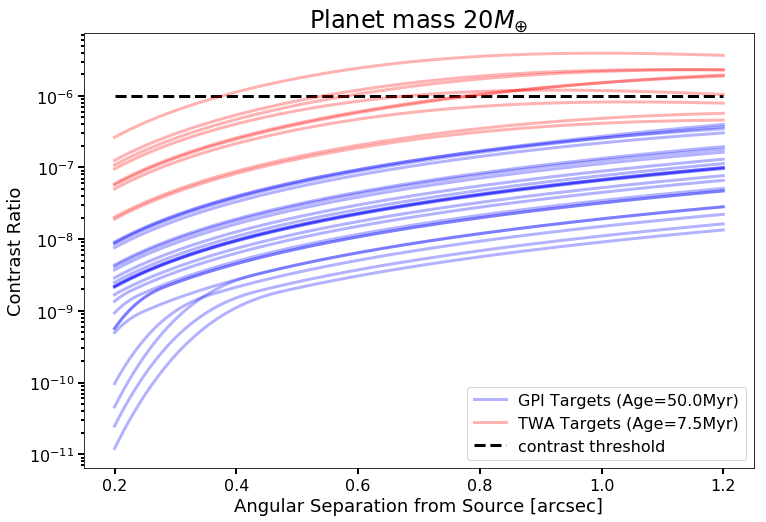

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
    
GPI = pd.read_csv("../GPIMdwarfs.csv", index_col=0)
M0 = 100 * Mmoon
Mplt = 20 # earth masses
age = 5.e7 # yrs
plotting_swarm(fig, ax, GPI, Mplt, M0, age, color='blue', label='GPI Targets (Age={0}Myr)'.format(age/1.e6))

GPI = pd.read_csv("../twatargets.csv", index_col=0)
M0 = 100 * Mmoon
Mplt = 20 # earth masses
age = 7.5e6 # yrs
plotting_swarm(fig, ax, GPI, Mplt, M0, age, color='red', label='TWA Targets (Age={0}Myr)'.format(age/1.e6))

contrast_thresh = 1.e-6    
ax.hlines(contrast_thresh, GPIIWA, GPIOWA, linestyle='--', label="contrast threshold")
ax.legend()

ax.set_title(r"Planet mass "+"{0}".format(Mplt)+"$M_{\oplus}$", fontsize=24)
ax.set_xlabel("Angular Separation from Source [arcsec]", fontsize=18)
ax.set_ylabel("Contrast Ratio", fontsize=18)
ax.set_yscale('log')

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


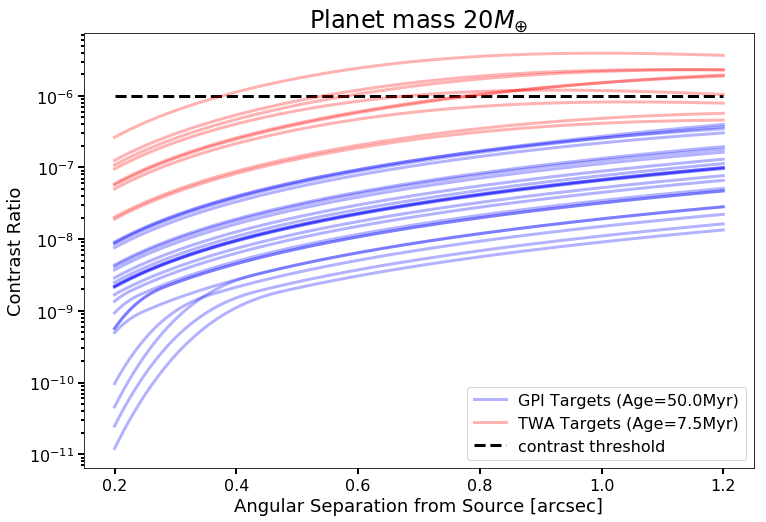

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
    
GPI = pd.read_csv("../GPIMdwarfs.csv", index_col=0)
M0 = 100 * Mmoon
Mplt = 20 # earth masses
age = 5.e7 # yrs
plotting_swarm(fig, ax, GPI, Mplt, M0, age, color='blue', label='GPI Targets (Age={0}Myr)'.format(age/1.e6))

TWA = pd.read_csv("../twatargets.csv", index_col=0)
M0 = 100 * Mmoon
Mplt = 20 # earth masses
age = 7.5e6 # yrs
plotting_swarm(fig, ax, TWA, Mplt, M0, age, color='red', label='TWA Targets (Age={0}Myr)'.format(age/1.e6))

contrast_thresh = 1.e-6    
ax.hlines(contrast_thresh, GPIIWA, GPIOWA, linestyle='--', label="contrast threshold")
ax.legend()

ax.set_title(r"Planet mass "+"{0}".format(Mplt)+"$M_{\oplus}$", fontsize=24)
ax.set_xlabel("Angular Separation from Source [arcsec]", fontsize=18)
ax.set_ylabel("Contrast Ratio", fontsize=18)
ax.set_yscale('log')

In [71]:
TWA

,TWA,ID,RA_2_A_ICRS_J2017_5_2000,DEC_2_D_ICRS_2017_5_2000,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,Teff,contrast_thresh,Moving Group,SimbadType,In GPI Sample,Age
0,1,V* TW Hya,11 01 51.8083,-34 42 17.031,K6Ve,60.0860,9.180,7.558,4057,K,6,0.667,0.1200,4057,3.000000e-06,TWA,T Tau-type Star,False,7500000.0
1,2,CD-29 8887,11 09 13.6749,-30 01 40.070,M2Ve,46.0806,8.875,6.927,3704,M,2,0.440,0.0230,3704,2.000000e-06,TWA,T Tau-type Star,False,7500000.0
2,3,Hen 3-600,11 10 27.738,-37 31 51.97,M4Ve+M4Ve,42.0000,9.290,7.041,0,M,4,0.200,0.0055,3100,3.000000e-06,TWA,T Tau-type Star,False,7500000.0
3,4,HD 98800,11 22 05.1800,-24 46 39.757,K5V(e),46.7000,7.386,5.759,4434,K,5,0.700,0.1900,4434,7.000000e-07,TWA,Variable of RS CVn type,False,7500000.0
4,5A,CD-33 7795,11 31 55.1407,-34 36 27.214,M2Ve,49.3786,9.150,6.987,3650,M,2,0.440,0.0230,3650,3.000000e-06,TWA,T Tau-type Star,False,7500000.0
6,6,V* BX Ant,10 18 28.6211,-31 50 02.826,M0Ve,65.6444,9.325,8.180,0,M,0,0.600,0.0720,3800,3.000000e-06,TWA,T Tau-type Star,False,7500000.0
7,7,V* CE Ant,10 42 29.9354,-33 40 16.226,M2Ve,34.0290,9.100,7.125,0,M,2,0.440,0.0230,3400,3.000000e-06,TWA,T Tau-type Star,True,7500000.0
13,13,CD-34 7390,11 21 17.24,-34 46 45.5,M1Ve+M1Ve,38.0000,9.038,NaN,0,M,1,0.490,0.0350,3600,3.000000e-06,TWA,Double or multiple star,False,7500000.0
17,21,HD 298936,10 13 14.6518,-52 30 54.000,K3Ve,53.3504,8.687,7.353,4834,K,3,0.810,0.2600,4834,2.000000e-06,TWA,T Tau-type Star,False,7500000.0
